<a href="https://colab.research.google.com/github/Labanya86/ISYS5002_2024-S2_A1_22451172_LabanyaBarman/blob/main/Heart_Risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

## Functions to Take Inputs

We are taking the inputs from the user using separate functions for each type of data.

All the functions will take the prompt string as an argument and return the value entered by the user, only and only if the entered value is valid. Otherwise, the function will keep asking the user to enter the value until a valid value is entered.

1. For the age, we will use "get_positive_integer" function. Age will always be a positive integer.

2. For the Gender, we are using the get_gender function.
3. For the height, weight, we are using the get_positive_float function.
4. For the smoking status, alcohol consumption, physical activity, we are using the get_yes_no function, as the answer will be either yes or no.

In [ ]:
def get_positive_integer(prompt: str) -> int:
    """
    Prompt the user to enter a  integer. Re-prompts if the input is invalid.

    Args:
        prompt (str): The message to display to the user.

    Returns:
        int: An integer entered by the user.
    """
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value

            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

def get_gender(prompt: str) -> str:
    """
    Prompt the user to enter their gender. Re-prompts if the input is invalid.

    Args:
        prompt (str): The message to display to the user.

    Returns:
        str: The gender entered by the user ('male' or 'female').
    """
    while True:
        value = input(prompt).strip().lower()
        if value in ['male', 'female']:
            return value
        else:
            print("Invalid input. Please enter 'male' or 'female'.")

def get_positive_float(prompt: str) -> float:
    """
    Prompt the user to enter a positive float. Re-prompts if the input is invalid.

    Args:
        prompt (str): The message to display to the user.

    Returns:
        float: A positive float entered by the user.
    """
    while True:
        try:
            value = float(input(prompt))
            if value > 0:
                return value
            else:
                print("Please enter a positive number.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def get_yes_no(prompt: str) -> str:
    """
    Prompt the user to enter 'yes' or 'no'. Re-prompts if the input is invalid.

    Args:
        prompt (str): The message to display to the user.

    Returns:
        str: The response entered by the user ('yes' or 'no').
    """
    while True:
        value = input(prompt).strip().lower()
        if value in ['yes', 'no']:
            return value
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")

def confirm_unusual_value(value, value_name):
    """
    Confirm with the user if the entered value is unusual.

    Args:
        value: The value to be confirmed.
        value_name (str): The name of the value being confirmed.

    Returns:
        bool: True if the user confirms the value, False otherwise.
    """
    confirm = input(f"The entered {value_name} ({value}) seems unusual. Are you sure? (yes/no): ").strip().lower()
    return confirm.lower()[0] == 'y'

In [ ]:
#Function to calculate the BMI and BMI category
def calculate_bmi_category(weight: float, height:float) -> str:
    """
    Calculate the BMI category of the user based on their weight and height.

    Categories:
    - Underweight: BMI < 18.5
    - Normal weight: 18.5 <= BMI < 25
    - Overweight: 25 <= BMI < 30
    - Obese: BMI >= 30

    Args:
        weight (float): The weight of the user in kilograms.
        height (float): The height of the user in meters.

    Returns:
        str: The BMI category of the user.
    """
    bmi = weight / (height ** 2)

    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"


In [ ]:
heart_condition_risk = {
    ('Underweight', 'Non-smoker', 'Non-drinker', 'Inactive'): 'Medium',
    ('Underweight', 'Non-smoker', 'Non-drinker', 'Active'): 'Low',
    ('Underweight', 'Non-smoker', 'Drinker', 'Inactive'): 'Medium',
    ('Underweight', 'Non-smoker', 'Drinker', 'Active'): 'Low',
    ('Underweight', 'Smoker', 'Non-drinker', 'Inactive'): 'High',
    ('Underweight', 'Smoker', 'Non-drinker', 'Active'): 'High',
    ('Underweight', 'Smoker', 'Drinker', 'Inactive'): 'High',
    ('Underweight', 'Smoker', 'Drinker', 'Active'): 'High',
    ('Normal weight', 'Non-smoker', 'Non-drinker', 'Inactive'): 'Medium',
    ('Normal weight', 'Non-smoker', 'Non-drinker', 'Active'): 'Low',
    ('Normal weight', 'Non-smoker', 'Drinker', 'Inactive'): 'Medium',
    ('Normal weight', 'Non-smoker', 'Drinker', 'Active'): 'Low',
    ('Normal weight', 'Smoker', 'Non-drinker', 'Inactive'): 'Medium',
    ('Normal weight', 'Smoker', 'Non-drinker', 'Active'): 'Medium',
    ('Normal weight', 'Smoker', 'Drinker', 'Inactive'): 'High',
    ('Normal weight', 'Smoker', 'Drinker', 'Active'): 'Medium',
    ('Overweight', 'Non-smoker', 'Non-drinker', 'Inactive'): 'Medium',
    ('Overweight', 'Non-smoker', 'Non-drinker', 'Active'): 'Medium',
    ('Overweight', 'Non-smoker', 'Drinker', 'Inactive'): 'Medium',
    ('Overweight', 'Non-smoker', 'Drinker', 'Active'): 'Medium',
    ('Overweight', 'Smoker', 'Non-drinker', 'Inactive'): 'High',
    ('Overweight', 'Smoker', 'Non-drinker', 'Active'): 'High',
    ('Overweight', 'Smoker', 'Drinker', 'Inactive'): 'High',
    ('Overweight', 'Smoker', 'Drinker', 'Active'): 'High',
    ('Obesity', 'Non-smoker', 'Non-drinker', 'Inactive'): 'High',
    ('Obesity', 'Non-smoker', 'Non-drinker', 'Active'): 'High',
    ('Obesity', 'Non-smoker', 'Drinker', 'Inactive'): 'High',
    ('Obesity', 'Non-smoker', 'Drinker', 'Active'): 'High',
    ('Obesity', 'Smoker', 'Non-drinker', 'Inactive'): 'High',
    ('Obesity', 'Smoker', 'Non-drinker', 'Active'): 'High',
    ('Obesity', 'Smoker', 'Drinker', 'Inactive'): 'High',
    ('Obesity', 'Smoker', 'Drinker', 'Active'): 'High',
}


In [ ]:
def store_user_input(age, gender, weight, height, smoker, drinker, exercise, heart_risk, file_name = 'user_inputs.csv'):
    """
    Store the user's input in a CSV file. Appends the input to the file.
    """

    if not os.path.exists(file_name):
        with open(file_name, 'w+') as file:
            file.write('Age,Gender,Weight,Height,Smoker,Drinker,Exercise,Heart Risk\n') # Write the header if the file is empty

    with open(file_name, 'a') as file:
        file.write(f'{age},{gender},{weight},{height},{smoker},{drinker},{exercise},{heart_risk}\n')



In [ ]:
# Mapping for heart condition risk
heart_condition_risk_encoding = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

def distribution_of_values(file_name='user_inputs.csv'):
    """
    Plot the distribution of values stored in the CSV file.
    """
    if not os.path.exists(file_name):
        print("No previous data found. Please enter some data first.")
        return

    data = pd.read_csv(file_name)

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    data['Age'].plot(kind='hist', bins=range(0, 121, 5), ax=axs[0, 0], title='Age Distribution')
    data['Weight'].plot(kind='hist', bins=range(20, 201, 10), ax=axs[0, 1], title='Weight Distribution')
    data['Height'].plot(kind='hist', bins=range(50, 251, 10), ax=axs[1, 0], title='Height Distribution')
    data['Heart Risk'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Heart Risk Distribution')

    plt.tight_layout()
    plt.show()
def distribution_of_heart_risk_based_on_age(file_name='user_inputs.csv'):
    """
    Plot the distribution of heart risk based on age stored in the CSV file.
    """
    if not os.path.exists(file_name):
        print("No previous data found. Please enter some data first.")
        return

    data = pd.read_csv(file_name)

    data.groupby('Age')['Heart Risk'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title('Distribution of Heart Risk based on Age')
    plt.ylabel('Count')
    plt.show()


def plot_previous_data(file_name = 'user_inputs.csv'):
    """
    Plot the user's previous data stored in the CSV file.
    """

    # Give users option to plot 2 different graphs
    # 1. Distribution of all values
    # 2. Distribution of heart risk based on age

    while True:
        print("1. Distribution of all values")
        print("2. Distribution of heart risk based on age")
        type_of_plot = get_positive_integer("Enter the type of plot you want to see (1 or 2): ")
        if type_of_plot in [1, 2]:
            break
        else:
            print("Invalid input. Please enter 1 or 2.")

    if type_of_plot == 1:
        distribution_of_values(file_name)
    elif type_of_plot == 2:
        distribution_of_heart_risk_based_on_age(file_name)




Welcome to the Heart Condition Risk Prediction System!



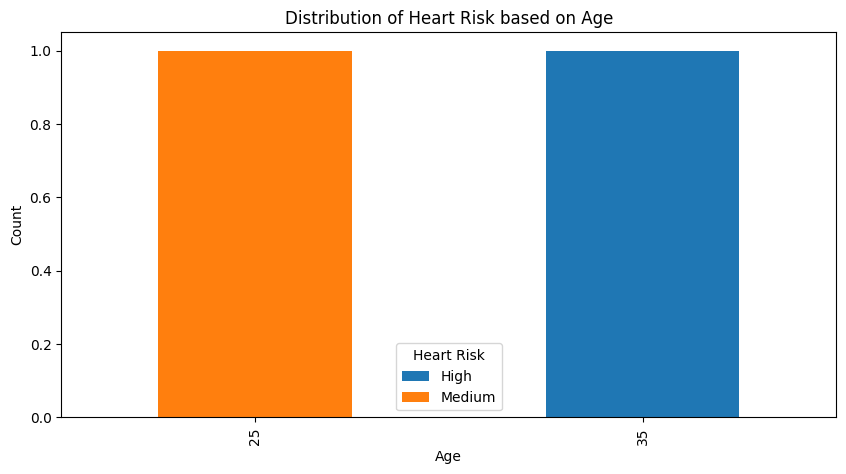

In [ ]:
print("Welcome to the Heart Condition Risk Prediction System!\n")

while True:
    plot_option = get_yes_no("Would you like to see a plot of previously stored data? (yes/no): ")
    if plot_option == 'yes':
        plot_previous_data()

    heart_risk_prediction_option = get_yes_no("Would you like to predict your heart condition risk? (yes/no): ")
    if heart_risk_prediction_option == 'no':
        break


    while True:
        age = get_positive_integer("Enter your age: ")
        if age < 10 or age > 100: # Check if the age is within a reasonable range
            if not confirm_unusual_value(age, "age"):
                continue
            else:
                break # Break out of the loop if the user confirms the value
        else:
            break # Break out if the age is within the valid range

    gender = get_gender("Enter your gender (male/female): ")

    while True:
        height = get_positive_float("Enter your height in cm: ")
        if height < 50 or height > 250: # Check if the height is within a reasonable range
            if not confirm_unusual_value(height, "height"):
                continue
            else:
                break # Break out of the loop if the user confirms the value
        else:
            break # Break out if the height is within the valid range


    while True:
        weight = get_positive_float("Enter your weight in kg: ")
        if weight < 20 or weight > 200: # Check if the weight is within a reasonable range
            if not confirm_unusual_value(weight, "weight"):
                continue
            else:
                break # Break out of the loop if the user confirms the value
        else:
            break # Break out if the weight is within the valid range



    smoking_status = get_yes_no("Do you smoke? (yes/no): ")
    if smoking_status == 'yes':
        smoking_status = 'Smoker'
    else:
        smoking_status = 'Non-smoker'

    alcohol_consumption = get_yes_no("Do you consume alcohol? (yes/no): ")
    if alcohol_consumption == 'yes':
        alcohol_consumption = 'Drinker'
    else:
        alcohol_consumption = 'Non-drinker'

    physical_activity = get_yes_no("Do you engage in physical activity? (yes/no): ")
    if physical_activity == 'yes':
        physical_activity = 'Active'
    else:
        physical_activity = 'Inactive'

    bmi_category = calculate_bmi_category(weight, height/100)
    predicted_heart_condition_risk = heart_condition_risk[(bmi_category, smoking_status, alcohol_consumption, physical_activity)]

    print("--------------------------------------------------------")
    print(f"BMI: {weight / (height/100) ** 2}")
    print(f"Heart Condition Risk: {predicted_heart_condition_risk}")

    store_user_input(age, gender, weight, height, smoking_status, alcohol_consumption, physical_activity, predicted_heart_condition_risk)
    print(f"\nYour input has been stored in 'user_inputs.csv'.")

    get_another_prediction = get_yes_no("Do you want to get another prediction? (yes/no): ")
    if get_another_prediction == 'no':
        break


### GenAI Usage 1 (Github Copilot Chat)

**Gen AI Prompt:**

I am making a command line application which will ask the user for age, gender, Height, weight, somking status, alcohol consumption status and physical activity status.

Now, Write python code to take the input with correct validation of the values. For incorrect values, ask the user again. Make it as interactive as you can.

**Gen AI Response:**

```python
def get_positive_integer(prompt):
    while True:
        try:
            value = int(input(prompt))
            if value > 0:
                return value
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

def get_gender(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ['male', 'female']:
            return value
        else:
            print("Invalid input. Please enter 'male' or 'female'.")

def get_positive_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            if value > 0:
                return value
            else:
                print("Please enter a positive number.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def get_yes_no(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ['yes', 'no']:
            return value
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")

def main():
    age = get_positive_integer("Enter your age: ")
    gender = get_gender("Enter your gender (male/female): ")
    height = get_positive_float("Enter your height in cm: ")
    weight = get_positive_float("Enter your weight in kg: ")
    smoking_status = get_yes_no("Do you smoke? (yes/no): ")
    alcohol_consumption = get_yes_no("Do you consume alcohol? (yes/no): ")
    physical_activity = get_yes_no("Do you engage in physical activity? (yes/no): ")

    print("\nCollected Information:")
    print(f"Age: {age}")
    print(f"Gender: {gender}")
    print(f"Height: {height} cm")
    print(f"Weight: {weight} kg")
    print(f"Smoking Status: {smoking_status}")
    print(f"Alcohol Consumption: {alcohol_consumption}")
    print(f"Physical Activity: {physical_activity}")

if __name__ == "__main__":
    main()
```

**Gen AI Response Effectiveness:**

In terms of effectiveness, the code achieves its intended purpose of collecting and displaying the user's health information. It uses a set of functions to validate user input and ensure that the entered values are of the expected types and within the specified ranges.

The get_positive_integer, get_gender, get_positive_float, and get_yes_no functions handle user input validation by repeatedly prompting the user until a valid input is provided. They check if the entered values are within the expected ranges and display appropriate error messages if not.



### GenAI Usage 2 (OpenAI ChatGPT 4)

**OpenAI ChatGPT 4 Prompt:**
Can you do the validation checks separately for the unusual values for age, height and weight? If the user enters an unusual value, Ask the user to confirm the value. If the user confirms the value, then accept it. Otherwise, ask the user to enter the value again.

```python
age = get_integer("Enter your age: ")
gender = get_gender("Enter your gender (male/female): ")
height = get_positive_float("Enter your height in cm: ")
weight = get_positive_float("Enter your weight in kg: ")
smoking_status = get_yes_no("Do you smoke? (yes/no): ")
alcohol_consumption = get_yes_no("Do you consume alcohol? (yes/no): ")
physical_activity = get_yes_no("Do you engage in physical activity? (yes/no): ")
```


**OpenAI ChatGPT 4 Response:**

```python

def confirm_unusual_value(value, value_name):
    confirm = input(f"The entered {value_name} ({value}) seems unusual. Are you sure? (yes/no): ").strip().lower()
    return confirm == 'yes'


age = get_integer("Enter your age: ", 0, 120, "age")
if age < 10 or age > 100:
    if not confirm_unusual_value(age, "age"):
        continue

gender = get_gender("Enter your gender (male/female): ")

height = get_positive_float("Enter your height in cm: ")
if height < 50 or height > 250:
    if not confirm_unusual_value(height, "height"):
        continue

weight = get_positive_float("Enter your weight in kg: ")
if weight < 20 or weight > 200:
    if not confirm_unusual_value(weight, "weight"):
        continue

smoking_status = get_yes_no("Do you smoke? (yes/no): ")
alcohol_consumption = get_yes_no("Do you consume alcohol? (yes/no): ")
physical_activity = get_yes_no("Do you engage in physical activity? (yes/no): ")
```

**Response Effectiveness:**

The code provided effectively handles unusual values for age, height, and weight by prompting the user to confirm the entered values. If the user confirms the unusual value, it accepts the value; otherwise, it asks the user to re-enter the value.

The confirm_unusual_value function is used to confirm unusual values for age, height, and weight. If the user confirms the unusual value, the function returns True; otherwise, it returns False. This allows the code to handle unusual values gracefully and ensure that the user provides valid input.

Overall, the code is effective in handling unusual values and ensuring that the user's health information is collected accurately.

**Modification Implemented**

